In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('data.csv')

### Visualização

In [4]:
df['Position']

0         RF
1         ST
2         LW
3         GK
4        RCM
5         LF
6        RCM
7         RS
8        RCB
9         GK
10        ST
11       LCM
12        CB
13       LCM
14       LDM
15        LF
16        ST
17       CAM
18        GK
19        GK
20       CDM
21        LS
22        GK
23        ST
24       LCB
25        RM
26        RM
27       CDM
28       LAM
29        LW
        ... 
18177     ST
18178     GK
18179     CB
18180     GK
18181     RB
18182    CDM
18183     GK
18184     CM
18185    LCM
18186     CM
18187     RB
18188     CM
18189     ST
18190     CM
18191     LB
18192    CDM
18193     RB
18194     GK
18195     CM
18196     CM
18197     CM
18198     GK
18199     CM
18200     ST
18201     RB
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

In [5]:
df.sample()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1000,185174,A. Poli,28,Italy,77,77,Bologna,9000000,34000,2040,...,74.0,76.0,72.0,72.0,5.0,5.0,5.0,5.0,5.0,15000000.0


# Estatísticas básicas

Distribuição do pé preferido dos jogadores

4211
13948


<BarContainer object of 2 artists>

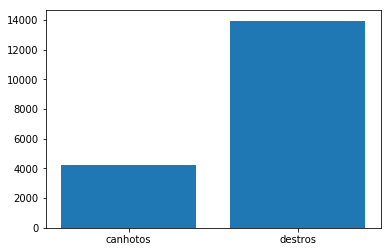

In [6]:
canhotos = df['Preferred Foot'].tolist().count('Left')
print(canhotos)
destros = df['Preferred Foot'].tolist().count('Right')
print(destros)
plt.bar(['canhotos', 'destros'], [canhotos, destros])

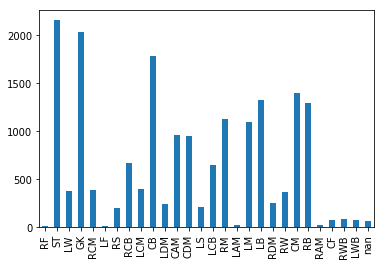

In [7]:
posicoes = df['Position'].unique()
posicoes_cnt = []
for i in posicoes:
    posicoes_cnt.append(df['Position'].tolist().count(i))

df_pos = pd.Series(posicoes_cnt, posicoes)
df_pos.plot.bar()

In [8]:
df.loc[df['Height'] == 182.88]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000,455000,2346,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000,380000,2201,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104000000.0
10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000,205000,2152,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127000000.0
11,182521,T. Kroos,28,Germany,90,90,Real Madrid,76000000,355000,2190,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156000000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000,165000,2077,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44000000.0
42,205600,S. Umtiti,24,France,87,92,FC Barcelona,57000000,205000,2147,...,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,121000000.0
52,171877,M. Hamšík,30,Slovakia,87,87,Napoli,46000000,125000,2188,...,84.0,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0,79000000.0
53,168651,I. Rakitić,30,Croatia,87,87,FC Barcelona,46000000,260000,2184,...,81.0,72.0,74.0,70.0,14.0,11.0,12.0,5.0,9.0,95000000.0
55,222492,L. Sané,22,Germany,86,92,Manchester City,61000000,195000,2090,...,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,125000000.0
79,220834,Marco Asensio,22,Spain,85,92,Real Madrid,54000000,215000,2050,...,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0,121000000.0


In [9]:
def convertendo_altura(altura):
    if altura == 'nan':
        return 6 * 30.48
    altura = str(altura)
    out = altura.split("'")
    if len(out) != 2:
        return float(altura)
    #print(altura)
    out = float(out[0])*30.48 + float(out[1])*2.54
    return float(out)
#df['Height'].fillna(6*30.48, inplace = True)
df['Height'] = df['Height'].apply(lambda x: convertendo_altura(x))
#df['Height']

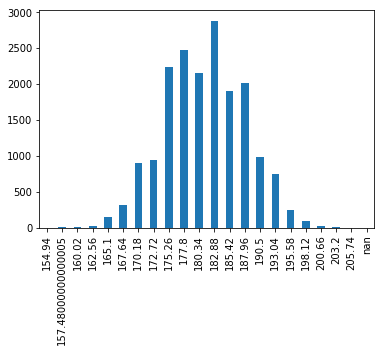

In [10]:
#fazer a distribuicao da altura dos jogadores e depois a media das alturas de acordo com cada posicao
altura = df['Height'].unique()
altura.sort()
altura_cnt = []
for i in altura:
    altura_cnt.append(df['Height'].tolist().count(i))

df_altura = pd.Series(altura_cnt, altura)
df_altura.plot.bar()

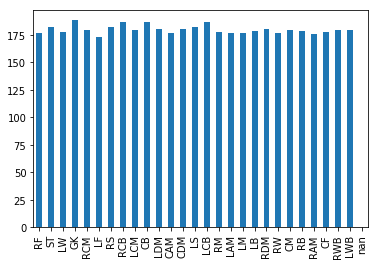

In [11]:
avg_alt_pos = []
#print(posicoes)
#mudar o range do y aqui, por de 160: 185 por ai
for i in posicoes:
    avg_alt_pos.append(df[df['Position'] == i]['Height'].mean())
df_avg_alt_pos = pd.Series(avg_alt_pos, posicoes)
df_avg_alt_pos.plot.bar()  

In [12]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Releas

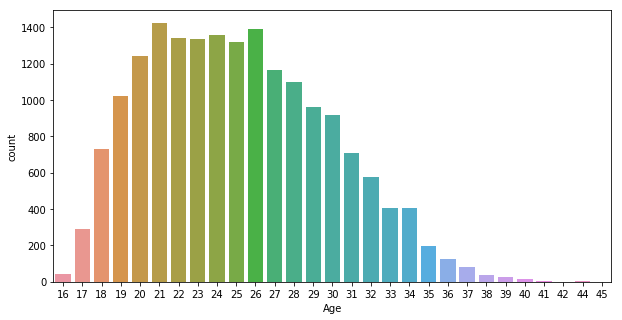

In [13]:
import seaborn as sns
#distribuiçao de idade
plt.figure(figsize=(10, 5))
age_distrib = sns.countplot(x="Age", data=df)
plt.show(age_distrib)

/home/mateus/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mateus/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


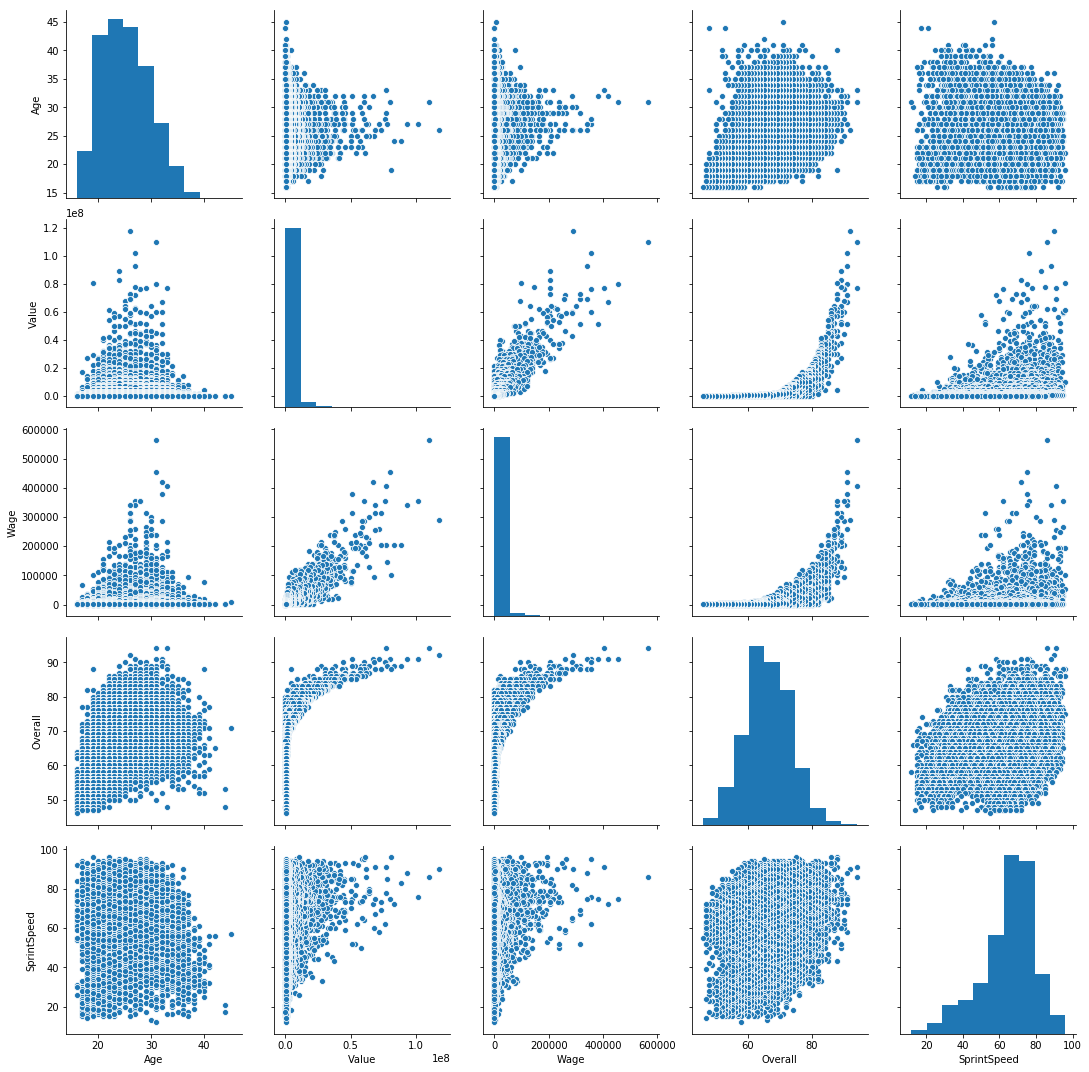

In [14]:
df["Normalized Value"] = (df["Value"] - df["Value"].mean()) / df["Value"].std()
df["Normalized Wage"] = (df["Wage"] - df["Wage"].mean()) / df["Wage"].std()
pairplt = sns.pairplot(data=df[['Age', 'Value', 'Wage', 'Overall', 'SprintSpeed']], height=3)
#, 'Dribbling', 'Stamina', 'Strength']                               
plt.show(pairplt)

In [15]:
#distribuiçao de paises (top 5 & outros paises)

countries = df.groupby("Nationality", as_index = False).count().sort_values("ID", ascending=False)

countries = countries[["Nationality", "ID"]]

countries = countries.rename(columns={"Nationality": "Nationality", "ID":"Count"})

total = countries["Count"].sum()

countries["Percentages"] = countries["Count"]/total

countries

,Nationality,Count,Percentages
46,England,1662,0.091284
59,Germany,1198,0.065799
139,Spain,1072,0.058878
6,Argentina,937,0.051464
55,France,914,0.050200
20,Brazil,827,0.045422
78,Italy,702,0.038557
31,Colombia,618,0.033943
81,Japan,478,0.026254
108,Netherlands,453,0.024881


### Parte não-trivial
Dado um orçamento, qual o melhor time possível?

### Real Madrid vs Barcelona

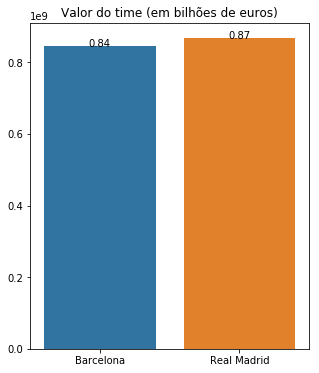

In [16]:
#comparação do valor dos times

real = df[df['Club'] == 'Real Madrid']
barca = df[df['Club'] == 'FC Barcelona']

team_value_real = real['Value'].sum()
team_value_barca = barca['Value'].sum()

x = ['Barcelona', 'Real Madrid']
y = [team_value_barca, team_value_real]

plt.figure(figsize=(5, 6))
plt.title("Valor do time (em bilhões de euros)")
ax = sns.barplot(x, y)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/1e9),
            ha="center")

plt.show(ax)
#porcentagem por país
#comparaçao do overrall rating
#comparaçao de salarios
#comparaçao de 'international reputation'

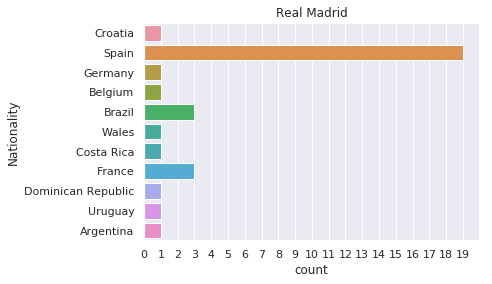

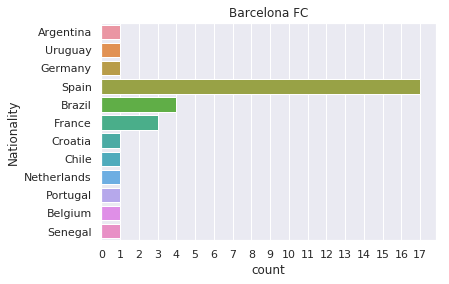

In [17]:
sns.set()
#plt.figure(figsize=(10,5))
plt.title("Real Madrid")
plt.xticks(np.arange(0, 21))
real_nation = sns.countplot(y='Nationality', data=real)
plt.show(real_nation)

#plt.figure(figsize=(10,5))
plt.title("Barcelona FC")
plt.xticks(np.arange(0, 21))
barca_nation = sns.countplot(y='Nationality', data=barca)
plt.show(barca_nation)

### Atlético Mineiro vs Cruzeiro

In [18]:
atletico = df[df['Club'] == "Atlético Mineiro"]
cruzeiro = df[df['Club'] == "Cruzeiro"]

### Non Trivial Step

In [19]:
def melhor_time(df, tat):
    tat442 = ['GK', 'RB', 'CB', 'CB', 'LB' , 'RM' , 'CM' , 'CM', 'LM', 'ST', 'ST']
    tat433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'RM', 'CM', 'LM', 'LW', 'ST', 'RW']
    time = []
    if tat == 442:
        tat = tat442
    else:
        tat = tat433
    top_5_pos = []
    
    for pos in tat:
        temp = df.where(df['Position'] == pos).dropna(how = 'all')
        temp = temp.sort_values(by = 'Overall', ascending = False)
        temp = temp['Name'].tolist()
        top_5_pos.append(temp[:6])
    
    for i in range(len(top_5_pos)):
        j = 0
        while top_5_pos[i][j] in time:
            j+=1
        time.append(top_5_pos[i][j])
        
    return time

In [20]:
melhor_time(df,433)

['De Gea',
 'Marcelo',
 'D. Godín',
 'S. Umtiti',
 'Azpilicueta',
 'K. Mbappé',
 'Thiago',
 'P. Aubameyang',
 'Neymar Jr',
 'Cristiano Ronaldo',
 'Bernardo Silva']

In [73]:
teams = df[["Club", "Value", "Overall"]]
teams = teams.groupby("Club").mean()
teams = (teams - teams.mean()) / teams.std()
teams = teams.sort_values("Overall", ascending=False)

df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Normalized Value,Normalized Wage
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110000000,565000,2202,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226000000.0,19.428932,25.240300
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,2228,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127000000.0,13.476494,17.967338
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118000000,290000,2143,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228000000.0,20.871948,12.739897
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,1471,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138000000.0,12.574609,11.376216
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,2281,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196000000.0,17.985917,15.694537


In [25]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Releas

In [ ]:
#TODO:

#consertar coluna de valor / salario

#agrupar tentar agrupar jogadores por posiçao:
# tirar goleiros e jogadores sem posiçao (nan)
# pegar apenas os atributos numericos
# normalizar
# dropar valor, salario e overall (para não deixar os dados disproporcionais)
# rodar varias iterações do kmeans com k variando e pegar a melhor
# rodar o kmeans com o k escolhido
# adicionar a coluna cluster no dataframe original
# plotar (top 10 de cada cluster) e analisar os clusters (esperado é separar os jogadores por posiçao)